In [6]:
#!pip install xlrd -> 밑 구문이 오류가 생기면 새로 설치해주고 주석 달아주기

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.4 MB/s eta 0:00:00


In [7]:
import pandas as pd

df = pd.read_excel('data/2016-01.xls', index_col='상품명')
df

,판매건수,가격,매출
상품명,,,
봉투,12362,50,618100
바나나,4285,3900,16711500
야채,4190,0,0
켐벨포도,2780,29800,82844000
알뜰특란,2768,5300,14670400
...,...,...,...
바지락,253,0,0
해표)카놀라유,253,5600,1416800
오)자른당면,252,5850,1474200


#### 판다스 데이타프레임의 기본적인 정보 얻어오기

- 앞에 10개 행 보기
- 뒤에 10개 행 보기

- 판매건수에서 큰 값 순으로 10개 (nlargest()이용)
- 판매건수에서 작은 값 순으로 10개 (nsmallest()이용)


In [22]:
# 200개를 전부 띄워주는것이 아니므로 내가 보고싶은 것만 띄워보기
df.head(10) # 앞에서부터 10개
df.tail(10) # 뒤에서부터 10개

df.nlargest(3,'가격')                # 모르면 shitf + tab 으로 예문이랑 내용 읽어보기
print(df.nlargest(10,'판매건수'))    # 판매건수에서 큰 값 순으로 10개
print('-'*100)
print(df.nsmallest(10,'판매건수'))   # 판매건수에서 작은 값 순으로 10개
print('-'*100)
df.nsmallest(10,['판매건수','가격']) # 판매건수로 뽑고 그 중에서 가격으로 내림차순????

        판매건수     가격        매출
상품명                          
봉투     12362     50    618100
바나나     4285   3900  16711500
야채      4190      0         0
켐벨포도    2780  29800  82844000
알뜰특란    2768   5300  14670400
딸기      2234      0         0
팔음산포도   2161  19800  42787800
봉투      2038     30     61140
애호박     1962   1490   2923380
청양고추    1901      0         0
----------------------------------------------------------------------------------------------------
                   판매건수    가격       매출
상품명                                   
오)자른당면              252  5850  1474200
롯데)알뜰소시지            252  4400  1108800
한돈앞다리/불고기,찌개(국내산)   252     0        0
CJ)행콩나물             253  1950   493350
바지락                 253     0        0
해표)카놀라유             253  5600  1416800
온동네광천파래재래김(전장)      255  2550   650250
새송이버섯               255     0        0
CJ)주부초밥왕(소풍)        256  3750   960000
황도복숭아               258     0        0
-----------------------------------------------------------------------

,판매건수,가격,매출
상품명,,,
"한돈앞다리/불고기,찌개(국내산)",252,0,0
롯데)알뜰소시지,252,4400,1108800
오)자른당면,252,5850,1474200
바지락,253,0,0
CJ)행콩나물,253,1950,493350
해표)카놀라유,253,5600,1416800
새송이버섯,255,0,0
온동네광천파래재래김(전장),255,2550,650250
CJ)주부초밥왕(소풍),256,3750,960000


#### 컬럼으로 추출

- 컬럼명들을 출력
- 판매건수 데이타 출력


In [20]:
df.columns

df['판매건수']
df[['판매건수']]

print(type(df['판매건수']))  # 자료형은 series
print(type(df[['판매건수']]))# 자료형은 dataframe

# 상황에 따라 series 로 뽑을지 dataframe으로 뽑을지 결정할 수 있다.

,판매건수,가격,매출
상품명,,,
"한돈앞다리/불고기,찌개(국내산)",252,0,0
롯데)알뜰소시지,252,4400,1108800
오)자른당면,252,5850,1474200
바지락,253,0,0
CJ)행콩나물,253,1950,493350
해표)카놀라유,253,5600,1416800
새송이버섯,255,0,0
온동네광천파래재래김(전장),255,2550,650250
CJ)주부초밥왕(소풍),256,3750,960000


#### 일련번호로 데이타 추출

- 1번째 행 레코드 출력
- '바나나' 행 레코드 출력

In [33]:
df.iloc[1]

df.loc['바나나']

,판매건수,가격,매출
상품명,,,
바나나,4285,3900,16711500
바나나,1213,0,0


#### 행에서 데이타 추출

- 야채, 딸기, 봉투행을 추출하여 매출순으로 정렬하기 (sort_values()이용)
- 바나나행부터 딸기행까지 추출
- 야채부터 딸기행까지 추출

In [74]:
df.loc[['야채','딸기','봉투']] # 1. 행 추출 or

product = ['야채','딸기','봉투'] # 2. 변수에 담아서 추출하여 매출 순으로 정렬(기본: 오름차순)
df.loc[product].sort_values('매출', ascending=False) # ascending=False : 내림차순

# df.loc['바나나':'딸기']
df.loc['야채':'딸기']

,판매건수,가격,매출
상품명,,,
야채,4190,0,0
켐벨포도,2780,29800,82844000
알뜰특란,2768,5300,14670400
딸기,2234,0,0


#### 조건으로 검색

- 가격이 10000 초과 상품 출력
- 가격이 10000에서 20000 사이 상품 출력

In [76]:
df['가격'] > 10000       
# 1번 방법
df[df['가격'] > 10000] # 해당 조건을 만족하는 녀석들만 보여주고 싶어요.
# 2번 방법
condi = df['가격'] > 10000 # 복잡해지기 시작하면 변수에 담아서 표현하는 것이 좋다.
print(df[condi])

print('-'*100)

# 1번 방법
df [(df['가격'] > 10000 ) & (df['가격'] < 20000 )]
# 2번 방법
condi = (df['가격'] > 10000 ) & (df['가격'] < 20000 )
print(df[condi])

             판매건수     가격        매출
상품명                               
켐벨포도         2780  29800  82844000
팔음산포도        2161  19800  42787800
동서)맥심모카골드믹스   380  23800   9044000
감귤            297  29800   8850600
----------------------------------------------------------------------------------------------------
       판매건수     가격        매출
상품명                         
팔음산포도  2161  19800  42787800


#### 판매건수로 정렬

In [87]:
df.sort_values('판매건수',ascending=False) # 판매건수 내림차순

df.sort_values('판매건수',ascending=False)[:10] # 판매건수 내림차순 & 앞에서 10개까지

df.sort_values('판매건수',ascending=True)[10:20] # 판매건수 오름차순 & 앞에서 10번~20번 앞까지

df.sort_values(['판매건수','가격'],ascending=True)[10:20] # [판매건수, 가격] 오름차순 & 앞에서 10번~20번 앞까지

df.sort_values(['판매건수','가격'],ascending=[True,False])[10:20] # [판매건수 : 오름차순, 가격 : 내림차순] 앞에서 10번 ~ 20번 앞까지

,판매건수,가격,매출
상품명,,,
롯데)갸또쇼콜라,259,3950,1023050
삼립)호빵(단팥야채),260,5500,1430000
코카콜라PET,260,2690,699400
풀)국산콩나물,260,2100,546000
한돈불고기(국내산),261,0,0
꼬막,264,0,0
파프리카,265,0,0
미닛)망고100,266,2950,784700
한성)튀김우동,266,1450,385700


#### 가격순으로 정렬하되 판매건수와 가격만 추출

In [102]:
df[['가격','판매건수']].sort_values('가격',ascending=False)

,가격,판매건수
상품명,,
켐벨포도,29800,2780
감귤,29800,297
동서)맥심모카골드믹스,23800,380
팔음산포도,19800,2161
부사,9800,844
...,...,...
특수야채류,0,520
켐벨포도,0,552
숙주,0,584


# [풀이]
1번 방법

temp = df[['판매건수','가격']]

temp

temp.sort_values('가격')
# ----
2번 방법
df[['가격','판매건수']].sort_values('가격',ascending=False)

상품명
켐벨포도           29800
감귤             29800
동서)맥심모카골드믹스    23800
팔음산포도          19800
부사              9800
목우촌)교자만두        8150
백설)맛밤패밀리팩       7950
봉지사과            7900
대추방울            7500
켈로그)콘푸로스트       7200
Name: 가격, dtype: int64


<Axes: xlabel='상품명'>

C:\Users\ict03_030\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53008 (\N{HANGUL SYLLABLE KEM}) missing from current font.
  func(*args, **kwargs)
C:\Users\ict03_030\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ict03_030\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ict03_030\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ict03_030\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\ict03_030\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYU

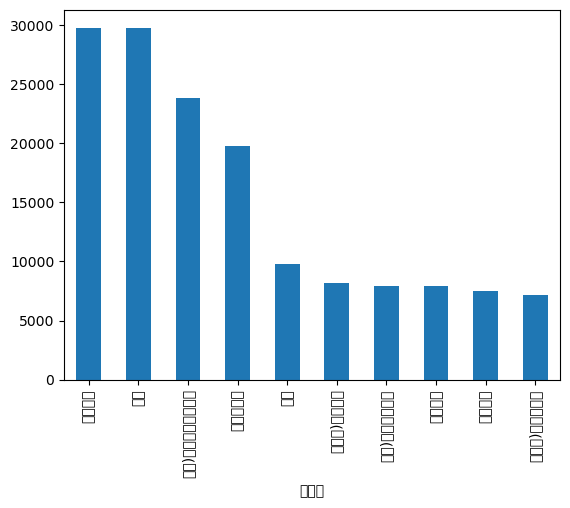

In [108]:
temp = df[['가격','판매건수']].sort_values('가격',ascending=False)[:10] # 너무 많으므로 10개까지만 추출
print(temp['가격'])

data = temp['가격']# 차트 만들어보기
data.plot(kind='bar')